In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import chardet

def read_abstract(file_path):
    with open(file_path, 'rb') as file:
        raw_data = file.read()
    detected = chardet.detect(raw_data)
    encoding = detected['encoding']
    with open(file_path, 'r', encoding=encoding) as file:
        return file.read().strip()

def print_similarity_results(abstracts, cosine_sim):
    print("\nSimilarity Results:")
    print("-" * 50)
    for i in range(len(abstracts)):
        for j in range(i+1, len(abstracts)):
            similarity = cosine_sim[i][j]
            print(f"Abstract {i+1} and Abstract {j+1}:")
            print(f"  Similarity: {similarity:.2%}")
            if similarity > 0.7:
                print("  Interpretation: High similarity")
            elif similarity > 0.4:
                print("  Interpretation: Moderate similarity")
            else:
                print("  Interpretation: Low similarity")
            print()

abstract_files = [
    "Abstrak1.txt",
    "Abstrak2.txt",
    "Abstrak3.txt",
    "Abstrak4.txt"
]
abstracts = []
for file in abstract_files:
    try:
        abstract = read_abstract(file)
        abstracts.append(abstract)
        print(f"Successfully read: {file}")
    except Exception as e:
        print(f"Error reading {file}: {str(e)}")

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(abstracts)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print_similarity_results(abstracts, cosine_sim)

Successfully read: Abstrak1.txt
Successfully read: Abstrak2.txt
Successfully read: Abstrak3.txt
Successfully read: Abstrak4.txt

Similarity Results:
--------------------------------------------------
Abstract 1 and Abstract 2:
  Similarity: 34.08%
  Interpretation: Low similarity

Abstract 1 and Abstract 3:
  Similarity: 34.43%
  Interpretation: Low similarity

Abstract 1 and Abstract 4:
  Similarity: 38.14%
  Interpretation: Low similarity

Abstract 2 and Abstract 3:
  Similarity: 33.22%
  Interpretation: Low similarity

Abstract 2 and Abstract 4:
  Similarity: 38.73%
  Interpretation: Low similarity

Abstract 3 and Abstract 4:
  Similarity: 47.41%
  Interpretation: Moderate similarity



In [2]:
from collections import Counter
import string

def parse_documents(abstracts):
    all_terms = []
    term_frequency = Counter()

    for abstract in abstracts:
        tokens = abstract.translate(str.maketrans('', '', string.punctuation)).lower().split()
        all_terms.extend(tokens)
        term_frequency.update(tokens)

    return term_frequency

abstract_files = [
    "Abstrak1.txt",
    "Abstrak2.txt",
    "Abstrak3.txt",
    "Abstrak4.txt"
]

abstracts = []
for file in abstract_files:
    try:
        abstract = read_abstract(file)
        abstracts.append(abstract)
        print(f"Successfully read: {file}")
    except Exception as e:
        print(f"Error reading {file}: {str(e)}")

term_frequency = parse_documents(abstracts)
sorted_term_frequency = term_frequency.most_common()
print("\nTerm Frequencies across all documents (sorted):")
print("-" * 50)
for term, freq in sorted_term_frequency:
    print(f"{term}: {freq}")

Successfully read: Abstrak1.txt
Successfully read: Abstrak2.txt
Successfully read: Abstrak3.txt
Successfully read: Abstrak4.txt

Term Frequencies across all documents (sorted):
--------------------------------------------------
the: 65
and: 24
to: 23
of: 21
in: 15
is: 13
with: 12
method: 11
a: 10
data: 10
that: 9
this: 8
study: 8
using: 8
results: 7
text: 7
be: 7
by: 6
it: 6
are: 6
on: 6
from: 6
can: 5
for: 5
we: 5
prediction: 5
authorship: 5
used: 5
as: 4
methods: 4
was: 4
style: 4
lstm: 4
medical: 4
symptoms: 4
accuracy: 4
cancer: 3
about: 3
treatment: 3
develop: 3
drug: 3
provide: 3
cdk2: 3
based: 3
value: 3
respectively: 3
attribution: 3
research: 3
while: 3
input: 3
dictionarybased: 3
backtranslation: 3
up: 3
3: 3
record: 3
tfidf: 3
cosine: 3
similarity: 3
were: 3
more: 3
known: 2
death: 2
chemotherapy: 2
side: 2
effects: 2
drugs: 2
therefore: 2
new: 2
anticancer: 2
not: 2
information: 2
biological: 2
activity: 2
inhibitors: 2
ensemble: 2
ie: 2
random: 2
forest: 2
pubchem: 2
finge

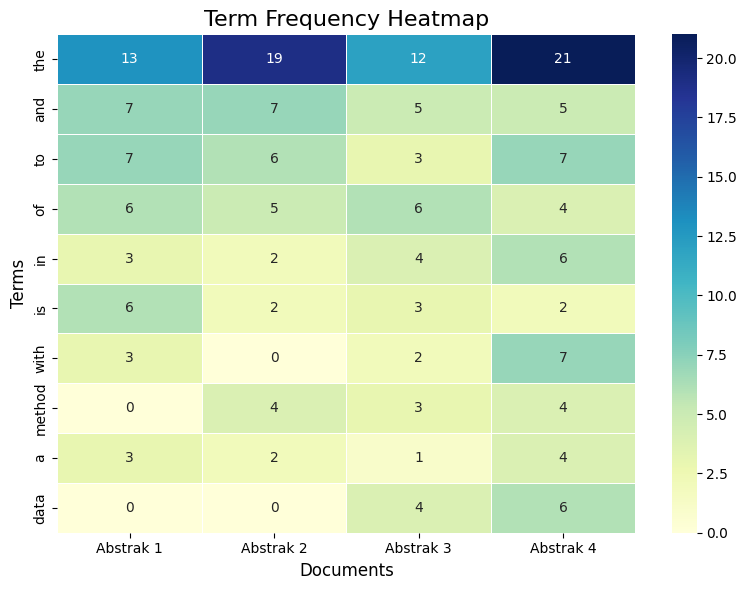

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def term_frequency_matrix(terms, abstracts):
    matrix = []
    for abstract in abstracts:
        tokens = abstract.translate(str.maketrans('', '', string.punctuation)).lower().split()
        term_counts = Counter(tokens)
        matrix.append([term_counts.get(term, 0) for term in terms])

    return np.array(matrix)

top_n_terms = [term for term, freq in term_frequency.most_common(10)]
matrix = term_frequency_matrix(top_n_terms, abstracts)
df = pd.DataFrame(matrix.T, index=top_n_terms, columns=[f'Abstrak {i+1}' for i in range(len(abstracts))])
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", cbar=True, linewidths=.5)
plt.title("Term Frequency Heatmap", fontsize=16)
plt.xlabel("Documents", fontsize=12)
plt.ylabel("Terms", fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-4-2839decfe314>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=terms, palette="viridis")


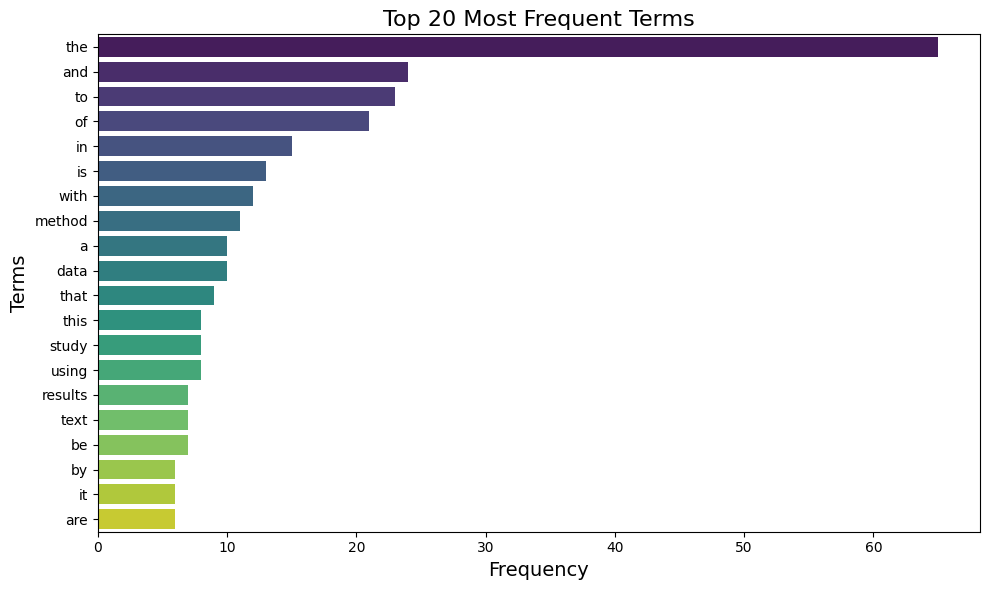

In [4]:
def plot_term_frequency(term_frequency, top_n=20):
    most_common_terms = term_frequency.most_common(top_n)
    terms, frequencies = zip(*most_common_terms)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies, y=terms, palette="viridis")

    plt.title(f'Top {top_n} Most Frequent Terms', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Terms', fontsize=14)
    plt.tight_layout()
    plt.show()

sorted_term_frequency = term_frequency.most_common()
plot_term_frequency(term_frequency, top_n=20)